## Лабораторная работа №4

**Кириллов Денис, ИУ5-22М**

### Задание 1

Найти параметры распределения для заданной выборки.

1. Сгенерировать параметры распределения Вейбулла для своего варианта
```matlab
clear all; 
N=10;                    % Номер варианта 
rand('state',10);        % Настройка датчика на номер варианта 
p1=0.5+2*rand;           % Первый параметр Распределения Вебулла
p2=1+3*rand;             % Второй параметр
```

(p1,p2) – параметры распределения Вейбулла

2. Исследовать форму функции и плотности распределения вероятности.
3. Сгенерировать случайную выборку из 300 элементов с распределением Вебулла с параметрами (p1,p2).
4. Подобрать параметры распределения для сгенерированной выборки. Задача заключается в поиске подходящей модели надежности по статистическим данным отказов, а также оценки параметров этого распределения.


### Задание 2

Генерация выборочных значений наработок на отказ и расчет параметров надежности невосстанавливаемых систем.

Параметры – файл Vari2.xlsx (строка = номер в группе + смещение по группам)
- Группа 1 – с 1-го
- Группа 2 – с 21-го
- Группа 3 – с 41-го
- Группа 4 – с 61-го
- Группа 5 – с 81-го
- Иностранцы – с 101

## Ход работы

### Задание 1

Построение показателей надежности (Pok_fQPL.m)

C:\Users\dturc\AppData\Local\Temp\ipykernel_39616\1368991661.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  L[n, t] = f[n, t] / P[n, t] # Интенсивность отказов
C:\Users\dturc\AppData\Local\Temp\ipykernel_39616\1368991661.py:20: RuntimeWarning: invalid value encountered in double_scalars
  L[n, t] = f[n, t] / P[n, t] # Интенсивность отказов


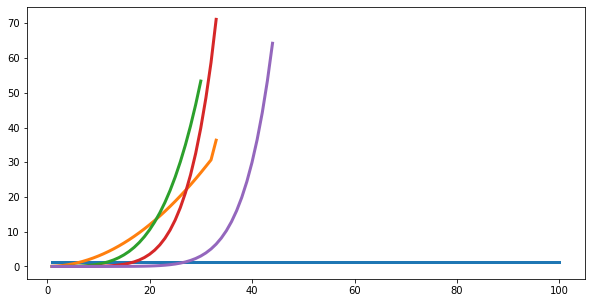

(5, 100)

In [29]:
import numpy as np
from scipy.stats import weibull_min
import matplotlib.pyplot as plt

N = 5
ParmR = np.array([[1, 3, 5, 7, 9], 
                  [0.8, 1, 1.5, 2, 3]])

f = np.zeros((N, 100))
Q = np.zeros((N, 100))
P = np.zeros((N, 100))
L = np.zeros((N, 100))

for n in range(N):
    for t in range(100): # восстановление - эквивалент отказа
        tr = (t + 1) / 10
        f[n, t] = weibull_min.pdf(tr, ParmR[0, n], scale=ParmR[1, n]) # Плотность вероятности отказа
        Q[n, t] = weibull_min.cdf(tr, ParmR[0, n], scale=ParmR[1, n]) # Вероятность отказа
        P[n, t] = 1 - Q[n, t] # Вероятность безотказной работы
        L[n, t] = f[n, t] / P[n, t] # Интенсивность отказов

fig = plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 101), L.T, linewidth=3)
plt.show()

L.shape

Статистические показатели (Pok_PQT.m)

In [30]:
def weibull(x, n, a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

n = 25

#Th = weibull_min.rvs(c=2, loc=0, scale=1, size=5000)  # Генерация времен наработки на отказ
rng = np.random.default_rng()
Th = rng.weibull(2, 5000)
Th_sortP = np.sort(Th)[::-1]  # Сортировка времен
Th_sortQ = np.sort(Th)
P = np.arange(0, n)  # Доля каждого элемента

# Код в методичке = хрень
# Th=random('weibull',5000, 2,1,n); - не должна иметь 2-х последних параметров
# https://www.mathworks.com/help/stats/prob.normaldistribution.random.html

# График функции безотказной работы
# fig1 = plt.figure(figsize=(10, 5))
# plt.stairs(Th_sortQ, P, linewidth=2)
# plt.xlabel('Time to Failure')
# plt.ylabel('Reliability Function')
# plt.title('Reliability Function')

# #  График функции вероятности отказа
# fig2 = plt.figure(figsize=(10, 5))
# plt.stairs(Th_sortQ, 1-P, linewidth=3)
# plt.xlabel('Time to Failure')
# plt.ylabel('Failure Probability')
# plt.title('Failure Probability')

# #  Наработка на отказ
# fig3 = plt.figure(figsize=(10, 5))
# plt.hist(Th, bins=10, density=True, edgecolor='black')
# plt.xlabel('Time to Failure')
# plt.ylabel('Density')
# plt.title('Time to Failure Histogram with Weibull Fit')
# plt.plot(np.sort(Th), weibull_min.pdf(np.sort(Th), c=2, loc=0, scale=1), 'r-')



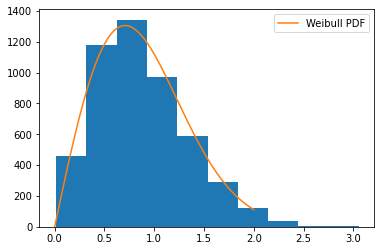

In [32]:
count, bins, _ = plt.hist(rng.weibull(2., 5000))
x = np.linspace(0, 2, 5000)
bin_spacing = np.mean(np.diff(bins))
plt.plot(x, weibull(x, 1., 2) * bin_spacing * 5000, label='Weibull PDF')
plt.legend()
plt.show()

### Задание 2

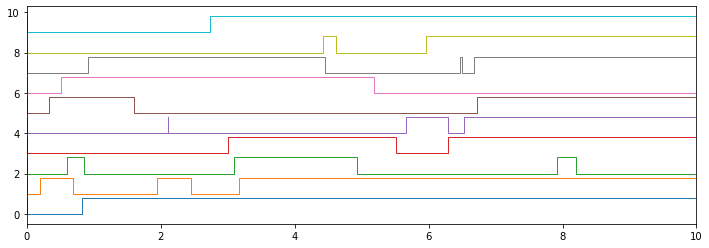

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Статистика наработки на отказ восстанавливаемых систем
Nobj = 10
Tmod = 10
# Tmod = 1000

fig, ax = plt.subplots(figsize=(12, 4))
for N in range(1, Nobj+1):
    t = 0
    n = 1
    Mstat = np.zeros((1, 2))
    Mstat[0, 0] = t
    Mstat[0, 1] = 1
    
    while t < Tmod:
        Twk = np.random.exponential(2)
        n += 1
        t += Twk
        Mstat = np.vstack((Mstat, [t, 0]))
        Tvos = np.random.exponential(5)
        n += 1
        t += Tvos
        Mstat = np.vstack((Mstat, [t, 1]))
    
    ax.step(Mstat[:, 0], (Mstat[:, 1]*0.8)+N-1, linewidth=1)
    # if N == 1:
        # ax.hold(True)

ax.set_xlim(0, 10)
# ax.hold(False)
plt.show()

